# Data cleaning - American dream

In [1]:
#Modules
import pandas as pd
import sqlalchemy
import mysql.connector


import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/American_dream")


from src.d00_utils.mysql_func import mysql_connect, save_to_mysql
connect = mysql_connect()

## 1 - Importation des données

In [26]:
df1 = pd.read_sql("survey_1",con=connect)

In [67]:
dfk = pd.read_sql("survey_k",con=connect)

## Modifications

### Vérifications des doublons

In [27]:
print(df1.duplicated().value_counts())

False    8627
dtype: int64


In [28]:
df1.shape

(8627, 32)

In [29]:
df1 = df1.drop(['index'], axis=1)

In [30]:
print(df1.duplicated(subset=df1.columns.difference(['Timestamp'])))

0       False
1       False
2       False
3       False
4       False
        ...  
8622    False
8623    False
8624    False
8625    False
8626    False
Length: 8627, dtype: bool


In [31]:
duplicated_rows = df1[df1.duplicated(subset = df1.columns.difference(['Timestamp']), keep=False)]

In [35]:
duplicated_rows.head(10)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
52,2020,2019-12-31 01:57:49,148000.0,United States,60642,Cassandra,5,"PostgreSQL, Cassandra, Google BigQuery",Full time employee,Data Scientist,...,we don't use these tech,we don't use these tech,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, but change roles",Female,Not Asked,Not Asked,1
53,2020,2019-12-31 01:57:38,148000.0,United States,60642,Cassandra,5,"PostgreSQL, Cassandra, Google BigQuery",Full time employee,Data Scientist,...,we don't use these tech,we don't use these tech,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, but change roles",Female,Not Asked,Not Asked,1
62,2020,2019-12-31 00:08:37,100000.0,Canada,None,Microsoft SQL Server,7,None,Full time employee,Analyst,...,SQL Server 2014,SQL Server 2008R2,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
64,2020,2019-12-31 00:01:44,100000.0,Canada,None,Microsoft SQL Server,7,None,Full time employee,Analyst,...,SQL Server 2014,SQL Server 2008R2,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
144,2020,2019-12-30 16:05:12,71500.0,United States,48192,Microsoft SQL Server,2,Microsoft Access,Full time employee,Manager,...,SQL Server 2017,SQL Server 2012,300K-1M (large city),Private business,Not Asked,"Stay with the same role, but change employers",Male,Not Asked,Not Asked,1
146,2020,2019-12-30 16:04:47,71500.0,United States,48192,Microsoft SQL Server,2,Microsoft Access,Full time employee,Manager,...,SQL Server 2017,SQL Server 2012,300K-1M (large city),Private business,Not Asked,"Stay with the same role, but change employers",Male,Not Asked,Not Asked,1
170,2020,2019-12-30 14:25:49,81000.0,United States,80027,Microsoft SQL Server,3,"Microsoft SQL Server, Microsoft Access, SQLite",Full time employee,Analyst,...,SQL Server 2014,SQL Server 2008,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, but change roles",Female,Not Asked,Not Asked,1
171,2020,2019-12-30 14:23:23,81000.0,United States,80027,Microsoft SQL Server,3,"Microsoft SQL Server, Microsoft Access, SQLite",Full time employee,Analyst,...,SQL Server 2014,SQL Server 2008,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, but change roles",Female,Not Asked,Not Asked,1
184,2020,2019-12-30 14:01:14,60000.0,United States,32256,Microsoft SQL Server,1,"Oracle, Teradata",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2016,SQL Server 2008,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
185,2020,2019-12-30 14:00:29,60000.0,United States,32256,Microsoft SQL Server,1,"Oracle, Teradata",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2016,SQL Server 2008,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1


In [20]:
df1 = df1.drop(['Timestamp'], axis=1)

In [21]:
print(df1.duplicated().value_counts())

False    8627
dtype: int64


### Tri pour sélectionner seulement les données des Etats-Unis

In [36]:
df1.shape

(8627, 31)

In [37]:
df1 = df1.loc[df1['Country'] == 'United States',:]

In [38]:
df1.shape

(5680, 31)

## 2 - Sélection des colonnes

### Database 1

In [4]:
print(df1.head())
df1.shape

   index  Survey Year           Timestamp  SalaryUSD        Country  \
0      0         2020 2020-01-04 18:50:34   115000.0  United States   
1      1         2020 2020-01-04 10:43:02   100000.0  United States   
2      2         2020 2020-01-04 09:51:46   100000.0          Spain   
3      3         2020 2020-01-04 01:08:54    70000.0  United States   
4      4         2020 2020-01-03 15:28:54   110000.0  United States   

  PostalCode       PrimaryDatabase  YearsWithThisDatabase  \
0         03  Microsoft SQL Server                     15   
1       None                 Other                      6   
2      28046  Microsoft SQL Server                      2   
3      94133  Microsoft SQL Server                      3   
4      95354                Oracle                     30   

                                      OtherDatabases    EmploymentStatus  ...  \
0  Microsoft SQL Server, MongoDB, Azure SQL DB (a...  Full time employee  ...   
1                                      MySQL

(8627, 32)

In [5]:
print(df1.columns)

Index(['index', 'Survey Year', 'Timestamp', 'SalaryUSD', 'Country',
       'PostalCode', 'PrimaryDatabase', 'YearsWithThisDatabase',
       'OtherDatabases', 'EmploymentStatus', 'JobTitle', 'ManageStaff',
       'YearsWithThisTypeOfJob', 'HowManyCompanies', 'OtherPeopleOnYourTeam',
       'CompanyEmployeesOverall', 'DatabaseServers', 'Education',
       'EducationIsComputerRelated', 'Certifications', 'HoursWorkedPerWeek',
       'TelecommuteDaysPerWeek', 'NewestVersionInProduction',
       'OldestVersionInProduction', 'PopulationOfLargestCityWithin20Miles',
       'EmploymentSector', 'LookingForAnotherJob', 'CareerPlansThisYear',
       'Gender', 'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')


J'ai choisi les colonnes qui me semblaient utiles pour la visualisation des données.

In [39]:
df1=df1[['SalaryUSD', 'Country', 'PostalCode', 'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob', 'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall', 'EmploymentSector', 'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender']]

### Database 2

In [68]:
print(dfk.head())
dfk.shape

   index  Unnamed: 0                                          Job Title  \
0      0           0  Data Analyst, Center on Immigration and Justic...   
1      1           1                               Quality Data Analyst   
2      2           2  Senior Data Analyst, Insights & Analytics Team...   
3      3           3                                       Data Analyst   
4      4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanD

(2253, 17)

In [69]:
print(dfk.columns)

Index(['index', 'Unnamed: 0', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')


J'ai ensuite choisi les colonnes qui semblaient utiles pour la suite.

In [70]:
dfk=dfk[['Job Title', 'Salary Estimate', 'Company Name', 'Location', 'Size', 'Sector']]

## 3 - Valeurs manquantes

### Database 1

In [54]:
missing_values_count = df1.isnull().sum()
print(missing_values_count)

SalaryUSD                     0
Country                       0
PostalCode                 1390
EmploymentStatus              0
JobTitle                      0
ManageStaff                   0
YearsWithThisTypeOfJob        0
HowManyCompanies              0
OtherPeopleOnYourTeam         0
CompanyEmployeesOverall       0
EmploymentSector              0
LookingForAnotherJob          0
CareerPlansThisYear           0
Gender                        0
dtype: int64


Il manque 1390 valeurs pour PostalCode. On ne peut pas assigner de valeur de code postal arbitraire dans cette colonne. Je garde donc les lignes où les valeurs sont manquantes, mais je garde en mémoire qu'il manque des valeurs si je travaille sur les codes postaux.

### Database 2

In [71]:
print(dfk.isnull().sum())

Job Title          0
Salary Estimate    0
Company Name       1
Location           0
Size               0
Sector             0
dtype: int64


Il y a une seule valeur manquante pour 'Company Name'.
J'ai choisi de la remplacer par 'Unknown'

In [74]:
dfk.loc[dfk['Company Name'].isnull(), "Company Name"] = "Unknown"

In [75]:
print(dfk.isnull().sum())

Job Title          0
Salary Estimate    0
Company Name       0
Location           0
Size               0
Sector             0
dtype: int64


## 4 - Colonnes à transformer en datetime

### Database 1

In [55]:
print(df1.dtypes)

SalaryUSD                  float64
Country                     object
PostalCode                  object
EmploymentStatus            object
JobTitle                    object
ManageStaff                 object
YearsWithThisTypeOfJob       int64
HowManyCompanies            object
OtherPeopleOnYourTeam       object
CompanyEmployeesOverall     object
EmploymentSector            object
LookingForAnotherJob        object
CareerPlansThisYear         object
Gender                      object
dtype: object


Aucune de mes colonnes ne correspond à une date.

### Database 2

In [76]:
print(dfk.dtypes)

Job Title          object
Salary Estimate    object
Company Name       object
Location           object
Size               object
Sector             object
dtype: object


Aucune de mes colonnes ne correspond à une date.

## 5 - Doublons

### Database 1

Fait plus haut

In [70]:
print(df1.shape)

(5680, 14)


### Database 2

In [77]:
print(dfk.duplicated().value_counts())

False    2253
dtype: int64


Cette database ne semble pas avoir de doublons.

## 6 - Vérifier la consistence des données

### Database 1

#### get all the unique values in the 'JobTitle' column

In [40]:
job_titles = df1['JobTitle'].unique()
print(len(job_titles))

21


In [41]:
job_titles.sort()
print(job_titles)

['Analyst' 'Analytics consultant' 'Architect' 'Consultant' 'DBA'
 'DBA (Development Focus - tunes queries, indexes, does deployments)'
 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'
 'DBA (Production Focus - build & troubleshoot servers, HA/DR)'
 'Data Scientist' 'Database Specialist' 'DevOps, Sr Software Engineer DBA'
 'Developer: App code (C#, JS, etc)'
 'Developer: Business Intelligence (SSRS, PowerBI, etc)'
 'Developer: T-SQL' 'Engineer' 'Manager' 'Other'
 'Principal database engineer' 'Sr Consultant ' 'Systems Administrator'
 'Technician ']


Il y a 21 job titles différents.

### Modifications : regrouper les catégories de Job Title

In [43]:
df1["JobTitle"] = df1["JobTitle"].apply(
    lambda x: "Database Admin" if x.startswith('DBA') else x
)

In [49]:
df1["JobTitle"] = df1["JobTitle"].apply(
    lambda x: "Developer" if x.startswith('Developer') else x
)

In [55]:
job_titles = df1['JobTitle'].unique()
print(len(job_titles))

16


In [56]:
job_titles.sort()
print(job_titles)

['Analyst' 'Analytics consultant' 'Architect' 'Consultant'
 'Data Scientist' 'Database Admin' 'Database Specialist'
 'DevOps, Sr Software Engineer DBA' 'Developer' 'Engineer' 'Manager'
 'Other' 'Principal database engineer' 'Sr Consultant '
 'Systems Administrator' 'Technician ']


In [57]:
s = df1["JobTitle"].value_counts()
df1.loc[df1["JobTitle"].isin(s[(s < 5)].index), "JobTitle"] = "Other"

In [58]:
job_titles = df1['JobTitle'].unique()
print(len(job_titles))

8


In [59]:
job_titles.sort()
print(job_titles)

['Analyst' 'Architect' 'Data Scientist' 'Database Admin' 'Developer'
 'Engineer' 'Manager' 'Other']


#### get all the unique values in 'HowManyCompanies' column

In [65]:
nb_companies = df1['HowManyCompanies'].unique()
print(len(nb_companies))

7


In [66]:
nb_companies.sort()
print(nb_companies)

["1 (this is the only company where I've had this kind of position)"
 '2 (I worked at another similar position elsewhere before this one)' '3'
 '4' '5' '6 or more' 'Not Asked']


In [67]:
df1["HowManyCompanies"] = df1["HowManyCompanies"].apply(
    lambda x: "1" if str(x).startswith('1') else "2" if str(x).startswith('2') else x
)

In [68]:
nb_companies = df1['HowManyCompanies'].unique()
print(len(nb_companies))

7


In [69]:
nb_companies.sort()
print(nb_companies)

['1' '2' '3' '4' '5' '6 or more' 'Not Asked']


Les valeurs pour HowManyCompanies sont classées dans 7 catégories. Il n'y a pas de catégorie redondante. 

#### get all the unique values in the 'OtherPeopleOnYourTeam' column

In [20]:
team = df1['OtherPeopleOnYourTeam'].unique()
print(len(team))

7


In [23]:
team.sort()
print(team)

['1' '2' '3' '4' '5' 'More than 5' 'None']


Les valeurs pour OtherPeopleOnYourTeam sont classées dans 7 catégories. Il n'y a pas de catégorie redondante. 

#### get all the unique values in the 'Gender' column

In [71]:
genders = df1['Gender'].unique()
print(len(genders))

20


Il semble y avoir beaucoup de réponses différentes dans la colonne 'Gender

In [72]:
genders.sort()
print(genders)

['Alien' 'Any human one' 'Attack Helicopter'
 'Attack Helicopter. (serious dude, gender questions?)'
 'Attack helicopter' 'Cyborg' 'Dragon' 'Female' 'I am Batman' 'Male'
 'Meat Popsicle ' 'Non-binary/third gender' 'Not Asked'
 'Prefer not to say' 'This question is inappropriate. ' 'Vulcan'
 'confused' 'human  This is also my race.' 'mosquito ' 'toad frog']


In [73]:
print(df1['Gender'].value_counts())

Male                                                    3281
Not Asked                                               1879
Female                                                   457
Prefer not to say                                         39
Non-binary/third gender                                    9
Attack Helicopter                                          1
Meat Popsicle                                              1
Dragon                                                     1
toad frog                                                  1
Alien                                                      1
I am Batman                                                1
Attack helicopter                                          1
Cyborg                                                     1
mosquito                                                   1
human  This is also my race.                               1
Any human one                                              1
This question is inappro

Sur la totalité des réponses dans la colonne Genre, on préférerait pouvoir les classer en 5 catégories : Male, Female, Non-binary/third gender, Prefer not to say et Not Asked.
Il y a donc 29 réponses à modifier.

In [74]:
valid_genders = ["Male", "Female", "Not Asked", "Prefer not to say", "Non-binary/third gender"]
df1.loc[~df1['Gender'].isin(valid_genders), "Gender"] = "other"

In [75]:
print(df1['Gender'].value_counts())

Male                       3281
Not Asked                  1879
Female                      457
Prefer not to say            39
other                        15
Non-binary/third gender       9
Name: Gender, dtype: int64


### Database 2

In [79]:
titles = dfk['Job Title'].unique()
print(len(titles))

1272


In [80]:
print(len(dfk['Salary Estimate'].unique()))

90


## 7 - Recherche de valeurs aberrantes

### Database 1

<AxesSubplot:xlabel='SalaryUSD'>

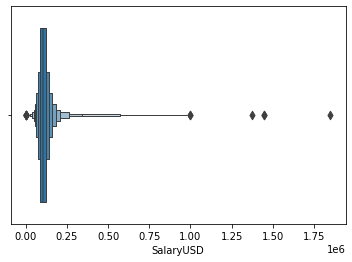

In [63]:
import seaborn as sns
sns.boxenplot(x = df1["SalaryUSD"])

<AxesSubplot:xlabel='YearsWithThisTypeOfJob'>

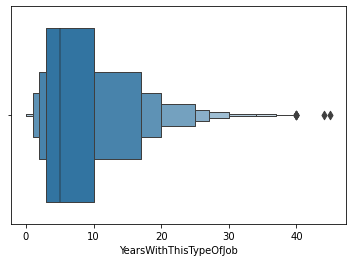

In [64]:
sns.boxenplot(x = df1["YearsWithThisTypeOfJob"])

### Database 2

### Sauvegarde des databases dans mysql

In [66]:
save_to_mysql(db_connect=connect,df_to_save=df1,df_name='survey_1_v1.0')

In [76]:
save_to_mysql(db_connect=connect,df_to_save=df1,df_name='survey_1_v2.0')